# Steepest Descent Example

From Carrier and Crook pg 257.

Find asymptotic approxiamtion for large $x$ for 

$$ \phi(x, \xi) = \frac{1}{2\pi} \int_{C_1} \frac{1}{s} \, e^{x(s\xi - \sqrt{s})}ds $$

where $\xi$ is a positive real number and $C_1$ is a vertical line in the complex plane with real part $\gamma$.

First we want to examine the contours of the real and imaginary parts of the exponent $x(s\xi - \sqrt{s})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

%matplotlib widget

In [2]:
def exponent(s, X=1, Xi=1):
    return X * (s * Xi - np.sqrt(s, dtype=complex))

def integrand(s, X=1, Xi=1):
    return np.exp(exponent(s, X=X, Xi=Xi)) / s

def Re_ex(x, y, X=1, Xi=1):
    s = x + 1j * y
    return exponent(s, X=X, Xi=Xi).real

def Im_ex(x, y, X=1, Xi=1):
    s = x + 1j * y
    return exponent(s, X=X, Xi=Xi).imag


Look at contour plot of exponent

In [3]:
xs, ys = np.linspace(-1, 1, 1001), np.linspace(-.6, .6, 1001)
Xs, Ys = np.meshgrid(xs, ys)

Z_re = Re_ex(Xs, Ys)
Z_im = Im_ex(Xs, Ys)

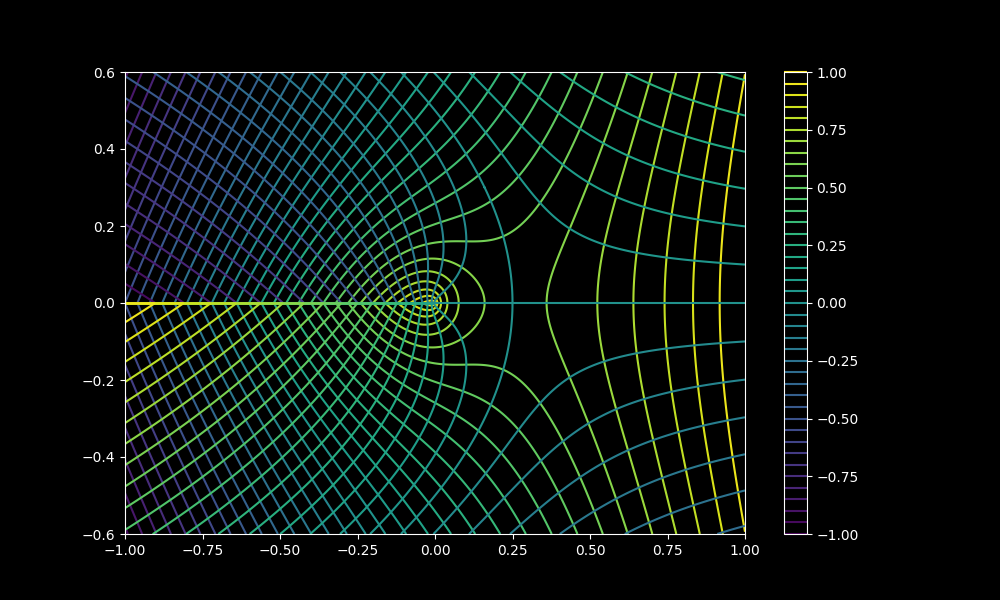

In [4]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,6))
ax1 = ax.contour(Xs, Ys, Z_re, levels=40)
ax2 = ax.contour(Xs, Ys, Z_im, levels=40)
ax.set_facecolor('k')
plt.colorbar(ax2);

Zero derivative of exponent occurs at $ s = \frac{1}{4\xi}$.  I want to see what the integrand looks like for increasing $x$ along a non-deformed path and along the steepest descent path.  First add these to above plot.

In [5]:
Xi = 1
X = 1

s0 = 1/(4*Xi**2)
gamma = .5
ts = np.linspace(-5, 5, 20002)
Py = np.linspace(-5, 5, 20002)
Cs = gamma + 1j * ts
Px = s0 - Xi**2 * Py **2
PS = Px + 1j * Py


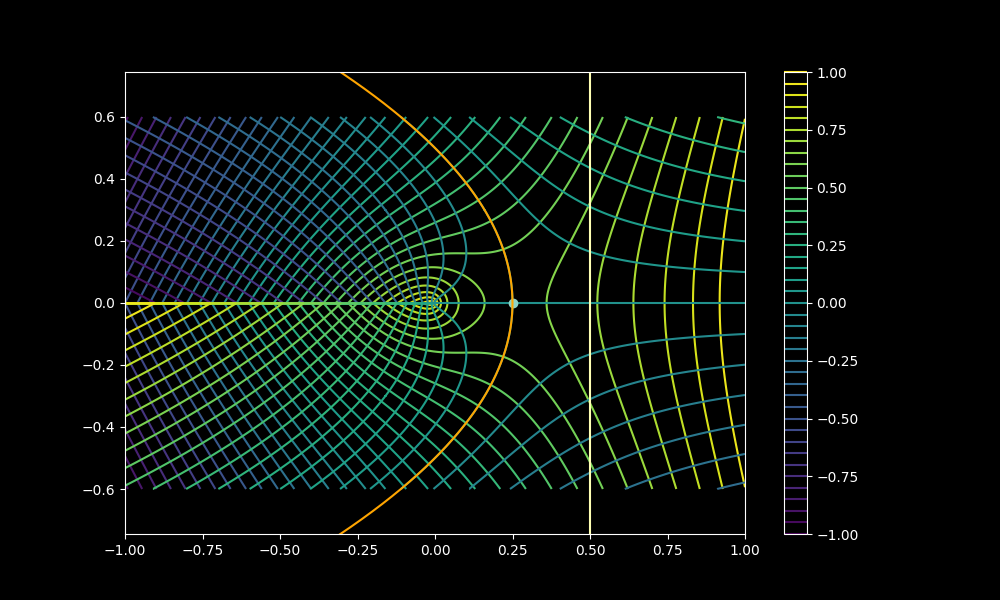

In [6]:
ax.plot(s0, 0, marker='o')
ax.plot(gamma * np.ones_like(Cs.imag), Cs.imag)
ax.plot(Px, Py, 'orange')

plt.axis('equal')
ax.set_ylim([-.6, .6]);
ax.set_xlim(-1, 1);
plt.show()

Plot integrand along straight line and parabolic paths.

In [7]:
Xi = 2   # Note changing these values moves s0 and P but we don't plot this
X = 10

s0 = 1/(4*Xi**2)
gamma = .5

ts = np.linspace(-5, 5, 20002)
Py = np.linspace(-5, 5, 20002)
Cs = gamma + 1j * ts
Px = s0 - Xi**2 * Py **2
PS = Px + 1j * Py

int_C1 = integrand(Cs, X=X, Xi=Xi)
int_P = integrand(PS, X=X, Xi=Xi)

exp_C1 = exponent(Cs, X=X, Xi=Xi)
exp_P = exponent(PS, X=X, Xi=Xi)

Integrand plots

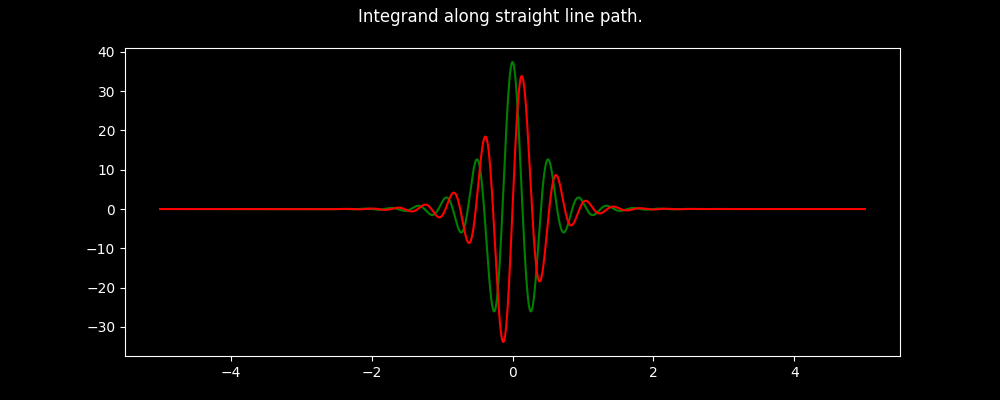

In [13]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(ts, int_C1.real, 'g')
ax.plot(ts, int_C1.imag, 'r');
fig.suptitle('Integrand along straight line path');

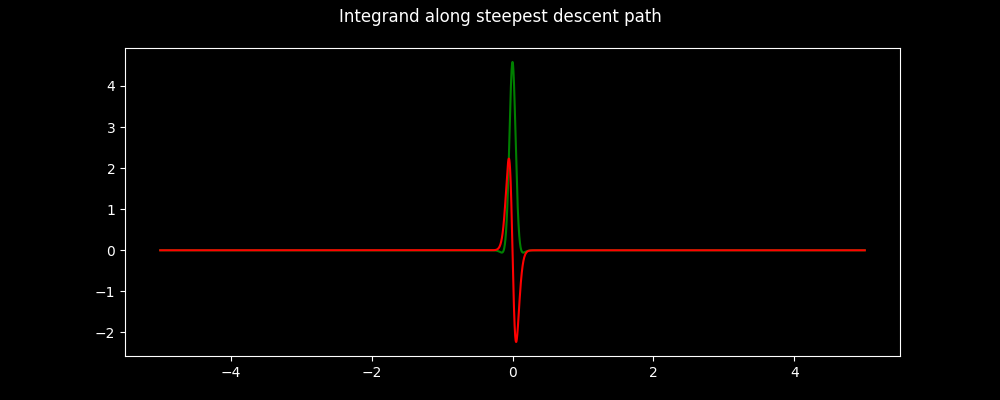

In [17]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(Py, int_P.real, 'g')
ax.plot(Py, int_P.imag, 'r')
fig.suptitle('Integrand along steepest descent path');

Exponent Plots

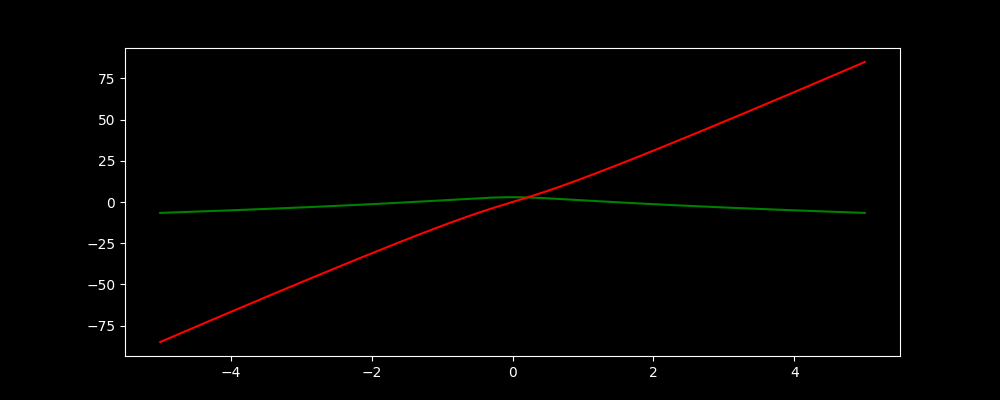

In [15]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(ts, exp_C1.real, 'g')
ax.plot(ts, exp_C1.imag, 'r')

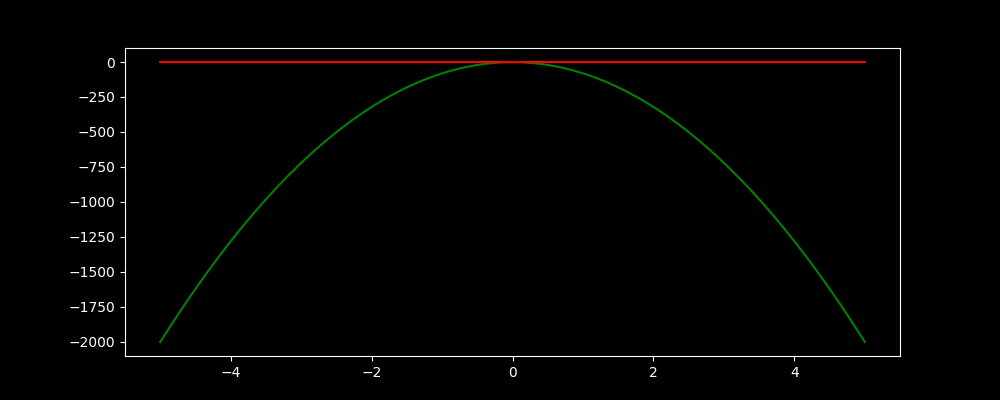

In [16]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(Py, exp_P.real, 'g')
ax.plot(Py, exp_P.imag, 'r');

The imaginary part of the exponent is constant.  In fact it appears to be zero

In [18]:
exponent(s0)

(-0.1875+0j)

It is zero. The integrand then is

In [19]:
integrand(s0)

(13.264465890886406+0j)

In [20]:
P2 = 1/ PS

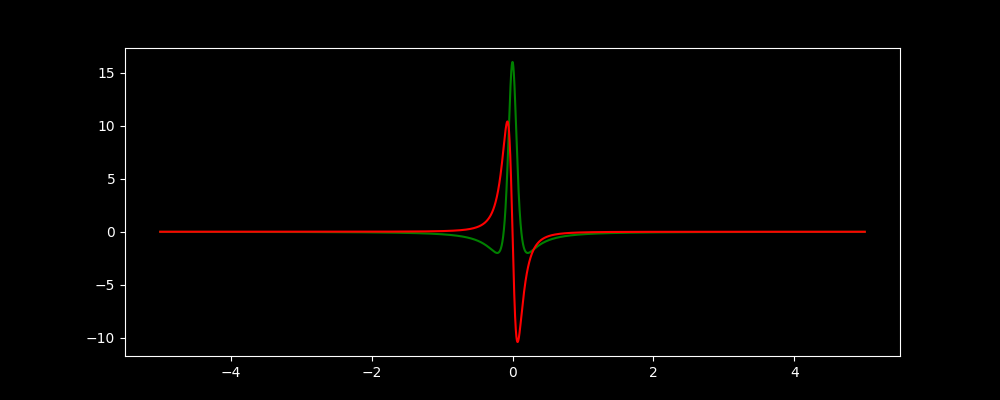

In [21]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(Py, P2.real, 'g')
ax.plot(Py, P2.imag, 'r')

In [22]:
xs, ys = np.linspace(.01, 1, 1002), np.linspace(.01, 1, 1002)
Xs, Ys = np.meshgrid(xs, ys)

Zs = Xs + 1j * Ys
Z_inv = 1 / Zs

Z_inv_real = Xs / (Xs**2 + Ys**2)

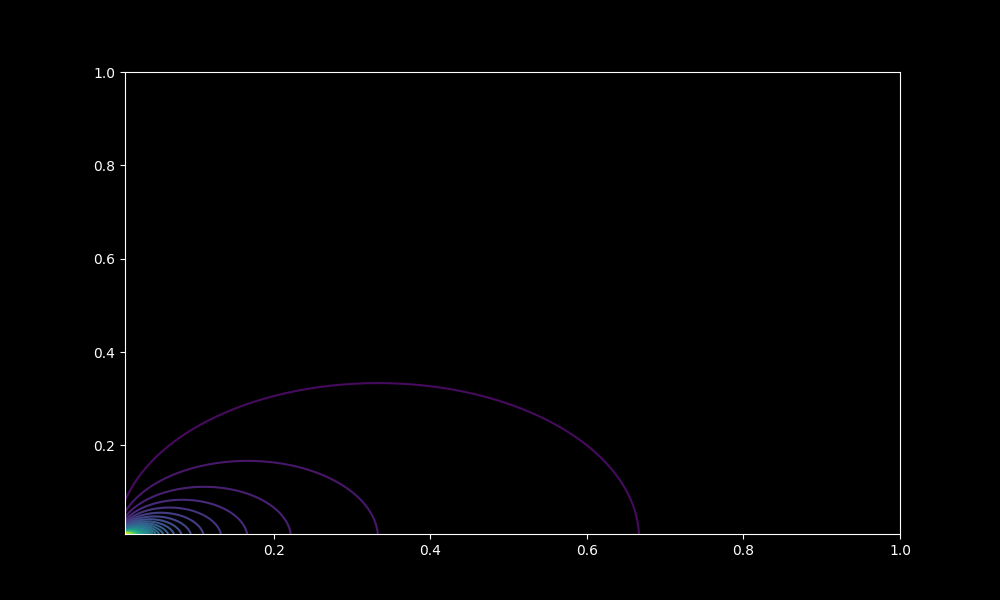

In [23]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,6))
ax.contour(Xs, Ys, Z_inv_real, levels=40)
# ax.contour(Xs, Ys, Z_inv.imag, levels=40)
